# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
import matplotlib.pyplot as plt

df['temperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
df['heart_rate'].hist()
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [6]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

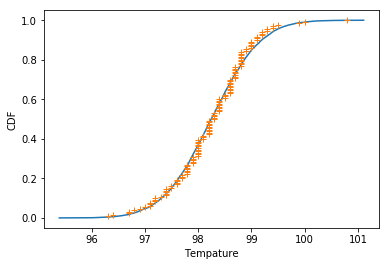

In [7]:
import numpy as np

def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

mean = np.mean(df.temperature)
std  = np.std(df.temperature)
normal = np.random.normal(mean, std, 10000)
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)
plt.plot(x_norm, y_norm)
plt.plot(x, y, marker='+', ls='none')
plt.xlabel('Tempature')
plt.ylabel('CDF')
plt.show()

You need at least 30 before you can reasonably expect an analysis based upon the normal distribution to be valid. Hence, the amount of 130 is reasonably large. Considering all the data given is of seperate people, then the sample data is Independant aswell.

In [30]:
bs_replicates = np.empty(1000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(df.temperature, len(df.temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('mean: {:0.5}'.format(np.mean(bs_replicates)))

mean: 98.25


The null hypothesis should be rejected. The mean body temperature of the sample set is 98.25°.

The mean of a single sample to a population with an hypothesised mean, a one-sample t-test is appropriate.

In [29]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [55]:
popmean=98.6
samp_mean=df.temperature.mean()
samp_std=df.temperature.std()
n=len(df.temperature)
statistic=(samp_mean-popmean)/(samp_std)
print("statistic: "+str(statistic))
pvalue=stats.norm.sf(abs(statistic))*2
print('pvalue: '+str(pvalue))

statistic: -0.4784196512470687
pvalue: 0.6323515496610859
